<img src="https://raw.githubusercontent.com/alan-barzilay/NLPortugues/master/imagens/logo_nlportugues.png"   width="150" align="right">


# Lista 2 - NN & Backpropagation



_________________________________________

Antes de começar o exercício,  não se esqueça de instalar todos os pacotes necessários para a sua execução.  

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from sklearn.model_selection import train_test_split
%matplotlib inline
tf.__version__

'2.15.0'

## Perceptron

O perceptron é uma "rede neural" de um só neurônio.  No nosso caso, temos a rede mais simples possível, com uma só entrada e uma só saída, sem ativação.

Temos 100 dados que serão usados para treinar 300 épocas do percéptron.

Vamos utilizar o modelo percéptron para aprender uma simples regressão linear, o objetivo é faze-lo aprender uma simples equação linear e tambem se acostumar com a sintaxe e funcionamento do TensorFlow


In [2]:
def f1(x):
    '''
    Funcao a ser aprendida
    '''
    return 5 + 10*x

In [3]:
xs = np.linspace(0,10,100)  # gera 100 valores no intervalo [0.10]
ys = f1(xs)                 # computa o valor de f1 nestes 100 valores
print(len(xs), "xs=", xs)
print(len(ys), "ys=", ys)

100 xs= [ 0.          0.1010101   0.2020202   0.3030303   0.4040404   0.50505051
  0.60606061  0.70707071  0.80808081  0.90909091  1.01010101  1.11111111
  1.21212121  1.31313131  1.41414141  1.51515152  1.61616162  1.71717172
  1.81818182  1.91919192  2.02020202  2.12121212  2.22222222  2.32323232
  2.42424242  2.52525253  2.62626263  2.72727273  2.82828283  2.92929293
  3.03030303  3.13131313  3.23232323  3.33333333  3.43434343  3.53535354
  3.63636364  3.73737374  3.83838384  3.93939394  4.04040404  4.14141414
  4.24242424  4.34343434  4.44444444  4.54545455  4.64646465  4.74747475
  4.84848485  4.94949495  5.05050505  5.15151515  5.25252525  5.35353535
  5.45454545  5.55555556  5.65656566  5.75757576  5.85858586  5.95959596
  6.06060606  6.16161616  6.26262626  6.36363636  6.46464646  6.56565657
  6.66666667  6.76767677  6.86868687  6.96969697  7.07070707  7.17171717
  7.27272727  7.37373737  7.47474747  7.57575758  7.67676768  7.77777778
  7.87878788  7.97979798  8.08080808  8.181

In [4]:
#Definindo, compilando e treinando nosso modelo
# Criando um modelo sequencial
model = tf.keras.Sequential([
    keras.Input(shape=(1,)),  # Camada de entrada com uma dimensão
    keras.layers.Dense(units=1),  # Camada densa (totalmente conectada) com uma unidade
])

# Compilando o modelo
model.compile(optimizer="sgd", loss="mean_squared_error")

# Configurando o otimizador como Gradiente Descendente Estocástico (sgd)
# e a função de perda como erro médio quadrático (mean_squared_error)

# Treinando o modelo com os dados de entrada (xs) e saída desejada (ys) por 300 épocas
model.fit(xs, ys, epochs=300)

Epoch 1/300
4/4 [==============================] - 1s 6ms/step - loss: 1327.2314
Epoch 2/300
4/4 [==============================] - 0s 4ms/step - loss: 3.0734
Epoch 3/300
4/4 [==============================] - 0s 4ms/step - loss: 2.9014
Epoch 4/300
4/4 [==============================] - 0s 4ms/step - loss: 2.8786
Epoch 5/300
4/4 [==============================] - 0s 4ms/step - loss: 2.6973
Epoch 6/300
4/4 [==============================] - 0s 4ms/step - loss: 2.8377
Epoch 7/300
4/4 [==============================] - 0s 4ms/step - loss: 2.5639
Epoch 8/300
4/4 [==============================] - 0s 4ms/step - loss: 2.4127
Epoch 9/300
4/4 [==============================] - 0s 4ms/step - loss: 2.4555
Epoch 10/300
4/4 [==============================] - 0s 4ms/step - loss: 2.2085
Epoch 11/300
4/4 [==============================] - 0s 5ms/step - loss: 2.1237
Epoch 12/300
4/4 [==============================] - 0s 3ms/step - loss: 2.0726
Epoch 13/300
4/4 [==============================] - 0s 4ms

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [6]:
print("prediction: "+ str(model.predict([17]))+"      real value: " + str(f1(17)))

1/1 [==============================] - 0s 94ms/step
prediction: [[175.01237]]      real value: 175


In [ ]:
val = np.linspace(0,10,63)
model.evaluate(x=val, y=f1(val))

A função `evaluate` retorna o "custo" (loss) da avaliação, definido na compilação.  Nesse caso, o valor reportado é o erro quadrático médio (MSE).

## Aprendendo uma função não linear

In [7]:
def f2(x):
    '''
    Funcao não linear a ser aprendida
    '''
    return (x**2 + x*3 + 4)/200

In [8]:
x = np.linspace(0,10,100)
y = f2(x)

# <font color='blue'>Questão 1 </font>
Defina as camadas para esta rede neural e treine seu modelo, note que a saída unitária _não deve_ ter função de ativação **(porque é um problema de regressão)**.

In [16]:
model = tf.keras.Sequential([
    keras.Input(shape=(1,)),
    keras.layers.Dense(units=1, ),  # Camada densa (totalmente conectada) com uma unidade

])
model.compile(optimizer="adam", loss="mean_squared_error")
model.fit(x,y,epochs=400)

Epoch 1/400
4/4 [==============================] - 0s 4ms/step - loss: 11.9739
Epoch 2/400
4/4 [==============================] - 0s 3ms/step - loss: 11.7978
Epoch 3/400
4/4 [==============================] - 0s 5ms/step - loss: 11.6127
Epoch 4/400
4/4 [==============================] - 0s 5ms/step - loss: 11.4361
Epoch 5/400
4/4 [==============================] - 0s 4ms/step - loss: 11.2572
Epoch 6/400
4/4 [==============================] - 0s 5ms/step - loss: 11.0758
Epoch 7/400
4/4 [==============================] - 0s 4ms/step - loss: 10.9103
Epoch 8/400
4/4 [==============================] - 0s 4ms/step - loss: 10.7372
Epoch 9/400
4/4 [==============================] - 0s 4ms/step - loss: 10.5659
Epoch 10/400
4/4 [==============================] - 0s 5ms/step - loss: 10.3923
Epoch 11/400
4/4 [==============================] - 0s 5ms/step - loss: 10.2234
Epoch 12/400
4/4 [==============================] - 0s 6ms/step - loss: 10.0525
Epoch 13/400
4/4 [==============================]

In [17]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
x_val = np.linspace(0,10,63)
y_val = f2(x_val)

model.evaluate(x=x_val,y=y_val)

2/2 [==============================] - 0s 11ms/step - loss: 0.0595


0.059515196830034256

In [19]:
# Criando um modelo sequencial
model = tf.keras.Sequential([
    keras.Input(shape=(1,)),  # Camada de entrada com uma dimensão
    keras.layers.Dense(units=64, activation='relu'),  # Camada densa com 64 unidades e função de ativação ReLU
    keras.layers.Dense(units=32, activation='relu'),  # Camada densa com 32 unidades e função de ativação ReLU
    keras.layers.Dense(units=1)  # Camada de saída com uma unidade
])

model.compile(optimizer="adam", loss="mean_squared_error")
model.fit(x, y, epochs=400)

Epoch 1/400
4/4 [==============================] - 2s 7ms/step - loss: 1.0756
Epoch 2/400
4/4 [==============================] - 0s 7ms/step - loss: 0.4251
Epoch 3/400
4/4 [==============================] - 0s 6ms/step - loss: 0.1114
Epoch 4/400
4/4 [==============================] - 0s 5ms/step - loss: 0.0172
Epoch 5/400
4/4 [==============================] - 0s 5ms/step - loss: 0.0059
Epoch 6/400
4/4 [==============================] - 0s 5ms/step - loss: 0.0172
Epoch 7/400
4/4 [==============================] - 0s 6ms/step - loss: 0.0222
Epoch 8/400
4/4 [==============================] - 0s 5ms/step - loss: 0.0170
Epoch 9/400
4/4 [==============================] - 0s 5ms/step - loss: 0.0067
Epoch 10/400
4/4 [==============================] - 0s 5ms/step - loss: 0.0047
Epoch 11/400
4/4 [==============================] - 0s 6ms/step - loss: 0.0073
Epoch 12/400
4/4 [==============================] - 0s 5ms/step - loss: 0.0059
Epoch 13/400
4/4 [==============================] - 0s 5ms/st

In [20]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                128       
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2241 (8.75 KB)
Trainable params: 2241 (8.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
x_val = np.linspace(0,10,63)
y_val = f2(x_val)

model.evaluate(x=x_val,y=y_val)

2/2 [==============================] - 0s 7ms/step - loss: 1.0369e-05


1.036945923260646e-05

____________________________
# <font color='blue'>Questão 2 </font>



O que acontece se você muda as funções de ativação? Teste algumas diferentes e descreva seus resultados, em especial a tangente hiperbólica




**<font color='red'> Sua resposta aqui </font>**


O que acontece se você mudar a função de otimização? Teste diferentes funções e descreva seus resultados, em especial as funções SDG e RMSprop



**<font color='red'> Sua resposta aqui </font>**

Volte a primeira parte desse notebook e troque a função de ativação da rede de uma camada (pérceptron) de sdg para adam, o que acontece?




**<font color='red'> Sua resposta aqui </font>**

A avaliação de performance que realizamos foi apenas para pontos contidos no mesmo intervalo que o conjunto de treino, ou seja, foi apenas uma interpolação. Sem alterar sua rede repita o teste realizando uma extrapolação, com pontos fora do intervalo [0;10] e descreva seus resultados. O que aconteceu com a performance?

In [ ]:
# Seu código aqui


**<font color='red'> Sua resposta aqui </font>**

# Prevendo se vai chover na Austrália

Os próximos exercícios são, em grande parte, uma tradução e adaptação para o português brasileiro do tutorial intitulado [Build Your First Neural Network with Pytorch](https://curiousily.com/posts/build-your-first-neural-network-with-pytorch/)
 entretanto algumas adaptações foram realizadas, tanto no texto, quanto no código, em relação à versão original para utilizar a biblioteca TensorFlow.

Aqui você aprenderá como implementar, treinar e utilizar uma Rede Neural *Feed-Foward* simples para uma tarefa de classificação binária.

Para tal, utilizaremos o pacote [TensorFlow 2.0](www.tensorflow.org) que é, atualmente, uma das principais ferramentas para a implementação de modelos neurais viáveis.

A tarefa que usaremos para fins de exemplo será a de prever se choverá ou não numa cidade australiana amanhã, utilizando dados meteorológicos mensurados na mesma cidade no dia de hoje. A redução dessa tarefa de previsão a uma classificação binária é, evidentemente, uma grande simplificação do problema real de previsão meteorológica, mas como veremos, ainda pode apresentar resultados interessantes, além do caráter didático.



As informações que utilizaremos para treinar nosso modelo para a tarefa de previsão de chuvas estão contidas num conjunto que reúne dados meteorológicos de diversas cidades australianas. Esse conjunto de dados foi curado e disponibilizado através do [Kaggle](https://www.kaggle.com/jsphyg/weather-dataset-rattle-package) por [Joe Young](https://www.kaggle.com/jsphyg).



In [22]:
!mkdir data

In [23]:
# Baixando os dados:
!curl https://raw.githubusercontent.com/alan-barzilay/NLPortugues/master/Semana%2002/data/weatherAUS.csv --output 'data/weatherAUS.csv'

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 13.5M  100 13.5M    0     0  14.3M      0 --:--:-- --:--:-- --:--:-- 14.3M


Os dados estão no formato `.csv` e, com eles em mãos, o primeiro passo é carregá-los em um *data-frame*, usando a função [`pd.read_csv()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) do *pandas*.


Com os dados carregados, é possível averiguar que eles são constituídos por 142193 entradas, cada uma contando com 24 variáveis distintas. É possível notar, também, que existem entradas para as quais nem todas as variáveis estão  instanciadas. Além disso, nem todos os valores estão nos formatos que gostaríamos que estivessem para serem processados.

Isso é normal. Dados reais são cheios de falhas e problemas, e exigem trabalho e entendimento para serem utilizados da maneira correta. Por isso, é necessário realizar um **pré-processamento** para adequar os dados, antes de os passarmos para o modelo.

O primeiro passo é escolher quais das variáveis meteorológicas nos interessam. No nosso caso, queremos prever se choverá ou não amanhã, então `RainTomorrow` será nossa variável alvo. Para prevê-la usaremos as variáveis  `Rainfall`, `Humidity3pm`, `Pressure9am` e `RainToday`, que serão nossas *features*.



Em seguida, iniciamos o pré-processamento, propriamente dito.

As variáveis `RainToday` e `RainTomorrow` possuem dois valores possíveis, *Yes* e *No*. Adeque esses valores, convertendo-os para $1$ e $0$, respectivamente.




A seguir, remova todas as entradas que não tenham instanciado os valores de todas as variáveis de interesse com a função [`dropna()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html), pois essas entradas são inúteis para treinar nosso modelo.



Com os dados pré-processados, é possível, agora, plotar as distribuições das variáveis de interesse para poder entender melhor como essas distribuições funcionam. Esse tipo de trabalho é muito importante na implementação real de redes neurais, conhecer os dados é fundamental para tirar o maior proveito do seu modelo e entender verdadeiramente seus resultados.




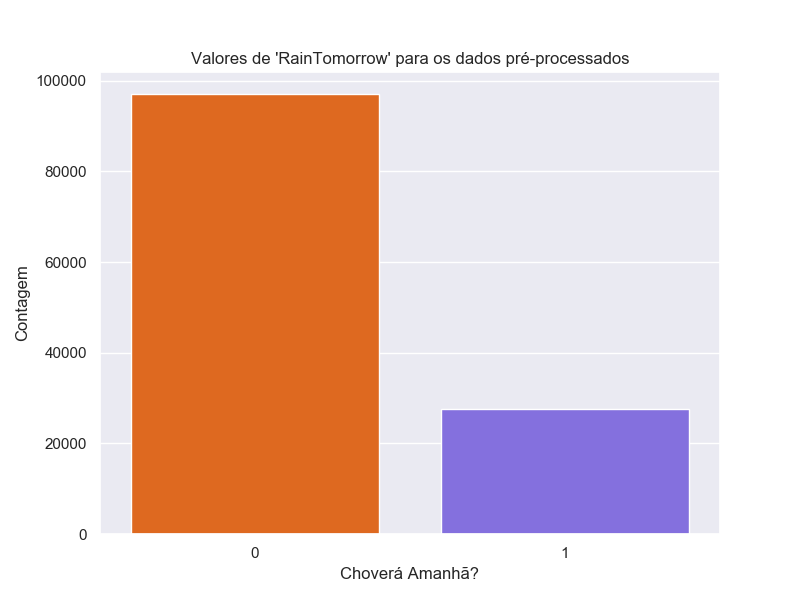



Dentre todas as distribuições das variáveis de interesse, a que mais nos concerne é a da variável alvo, `RainTomorrow`, representada na figura acima.


Essa distribuição nos revela um grande desbalanço entre os dois valores possíveis dessa variável, que constituirão as duas classes do nosso problema de classificação. Esse é um dado importante, pois pode influenciar significativamente a capacidade preditiva do modelo treinado.

Existem maneiras de se lidar com o desbalanceamento dos dados, mas nesse tutorial utilizaremos os dados dessa forma. Isso significa que o *baseline* para a performance do nosso modelo deve ser $78\%$, isso porque, se um modelo chutasse que amanhã não irá chover, todas as vezes, ele obteria uma performance dessa ordem e, como esperamos gerar um modelo mais "inteligente" que isso, esperamos também que a a nossa performance seja superior a essa.

Todo o código referente a esse pré-processamento deve ser escrito pelo próprio aluno seguindo o esqueleto das funções presentes no notebook. Para agilizar a exploração dos dados nós já fornecemos a implementação da função `visualize_data()` que plota visualizações para as distribuições das variáveis de interesse.

In [25]:
def visualize_data(data):
    """Gera graficos das distribuicoes das features"""

    ibm_pltt = ['#648FFF', '#785EF0', '#DC267F',
                '#FE6100', '#FFB000']  # Paleta colorblind-friendly

    # RainToday:
    sns.set()
    sns.set_palette(sns.color_palette([ibm_pltt[2], ibm_pltt[0]]))
    sns.countplot(x=data.RainToday)
    plt.xlabel('Choveu Hoje?')
    plt.ylabel('Contagem')
    plt.title("Valores de 'RainToday' para os dados pré-processados")
    plt.show()

    # RainTomorrow:
    sns.set()
    sns.set_palette(sns.color_palette([ibm_pltt[3], ibm_pltt[1]]))
    sns.countplot(x=data.RainTomorrow)
    plt.xlabel('Choverá Amanhã?')
    plt.ylabel('Contagem')
    plt.title("Valores de 'RainTomorrow' para os dados pré-processados")
    plt.show()

    # Humidity3pm:
    sns.set()
    sns.displot(data.Humidity3pm, color=ibm_pltt[0], stat='density', kde=True)
    plt.xlabel('Umidade às 3PM')
    plt.ylabel('Densidade normalizada')
    plt.title("Distribuição da variável 'Humidity3pm' para os dados pré-processados")
    plt.show()

    # Pressure9am:
    sns.set()
    sns.displot(data.Pressure9am, color=ibm_pltt[4], stat='density', kde=True)
    plt.xlabel('Pressão atmosférica às 9AM')
    plt.ylabel('Densidade normalizada')
    plt.title("Distribuição da variável 'Pressure9amm' para os dados pré-processados")
    plt.show()

    # Rainfall:
    sns.set()
    sns.histplot(data.Rainfall, color=ibm_pltt[1], bins=500, kde=False)
    plt.xlim(0, 10)
    plt.xlabel('Pluviosidade')
    plt.ylabel('Densidade normalizada')
    plt.title("Distribuição da variável 'Rainfall' para os dados pré-processados")
    plt.show()

    return


## Pré processamento dos dados
Já definimos uma função basica para lhe ajudar a explorar os dados, você precisará escrever uma função para carregar os dados, uma de pré-processamento e outra para fazer a separação em teste e treino.

# <font color='blue'>Questão 3 </font>
Complete as funções aqui descritas seguindo a assinatura sugerida

Para separar em treino e teste, de uma olhada na função [train_test_split()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) do Scikit-Learn

In [41]:
import pandas as pd

usecols = ["Rainfall", "Humidity3pm", "Pressure9am", "RainToday", "RainTomorrow"]
df = pd.read_csv("/content/data/weatherAUS.csv", usecols=usecols)

df['RainToday'] = df['RainToday'].map({'Yes': 1, 'No': 0})
df['RainTomorrow'] = df['RainTomorrow'].map({'Yes': 1, 'No': 0})

df["RainTomorrow"].nunique()

2

In [63]:
random_state = 42
test_size = 0.2

x_values = df.drop("RainTomorrow", axis=1)
y_values = df["RainTomorrow"]
x_train, x_test, y_train, y_test = train_test_split(x_values, y_values, random_state=random_state, test_size=test_size)

In [64]:
y_values

0         0
1         0
2         0
3         0
4         0
         ..
142188    0
142189    0
142190    0
142191    0
142192    0
Name: RainTomorrow, Length: 124689, dtype: int64

In [65]:
def load_data(data_path='data/weatherAUS.csv')-> pd.DataFrame:
    """Funcao que importa dados de um arquivo csv, usando pandas"""
    usecols = ["Rainfall", "Humidity3pm", "Pressure9am", "RainToday", "RainTomorrow"]
    raw_data = pd.read_csv(data_path, usecols=usecols)
    return raw_data

def pre_processing(raw_data:pd.DataFrame)-> pd.DataFrame:
    """Funcao que filtra e limpa os dados meteorologicos para o treinamento"""
    raw_data['RainToday'] = raw_data['RainToday'].map({'Yes': 1, 'No': 0})
    raw_data['RainTomorrow'] = raw_data['RainTomorrow'].map({'Yes': 1, 'No': 0})
    processed_data = raw_data.dropna()

    return processed_data

def split_data(data:pd.DataFrame, val_size= 0.2)-> np.array:
    """Funcao que separa seus dados em teste e treino conforme a proporcao val_size"""
    x_values = data.drop("RainTomorrow", axis=1)
    y_values = data["RainTomorrow"]
    x_train, x_val, y_train, y_val = train_test_split(x_values, y_values, random_state=random_state, test_size=test_size)

    return x_train, x_val, y_train, y_val

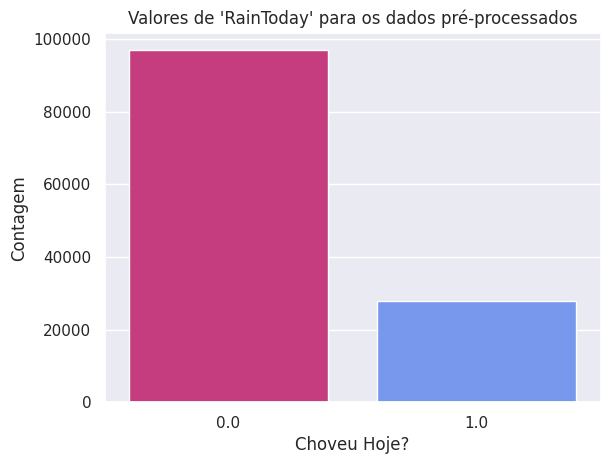

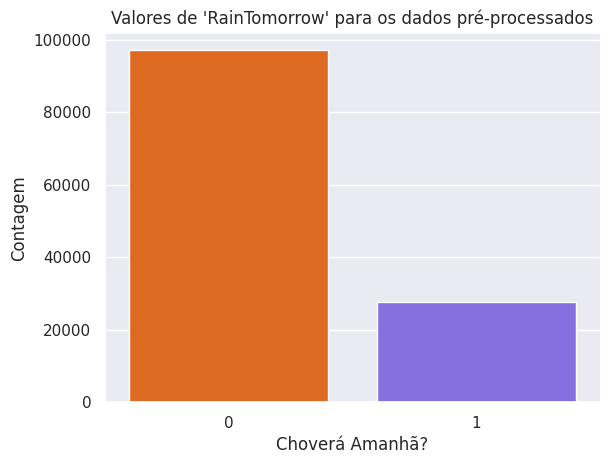

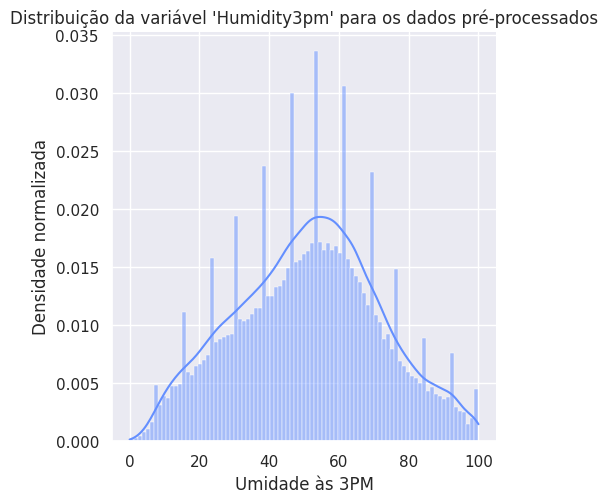

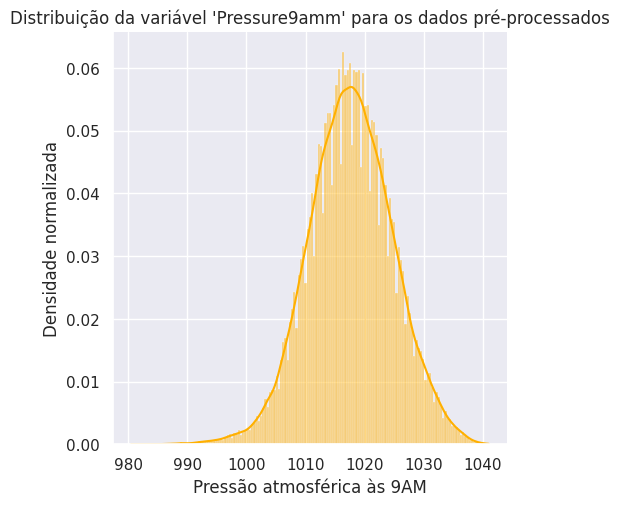

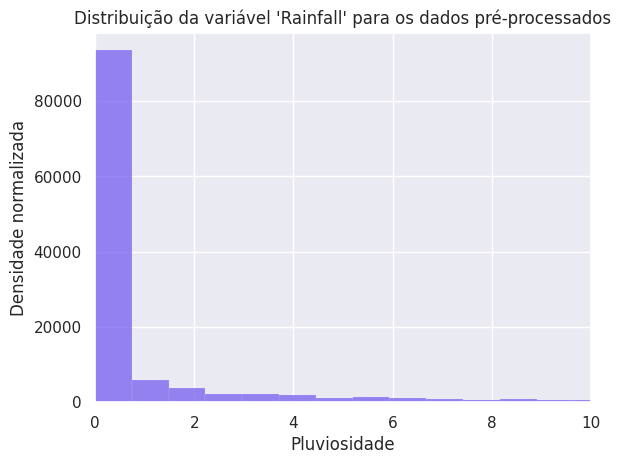

In [66]:
data_path = "/content/data/weatherAUS.csv"
random_state = 42
test_size = 0.2

df = load_data()
df = pre_processing(df)
visualize_data(df)
x_train, x_val, y_train, y_val = split_data(df,)

# <font color='blue'>Questão 4 </font>
Agora que você ja ganhou uma familiaridade com a API Keras, escreva sozinho do começo ao fim um modelo que ira dizer se amanhã vai chover ou não e avalie sua performance.


In [69]:
# Criando um modelo sequencial para um problema de classificação binária
model = tf.keras.Sequential([
    keras.Input(shape=(4,)),            # Número de features no x_train
    keras.layers.Dense(units=10, activation='relu'),  # Camada oculta com 64 unidades e função de ativação ReLU
    keras.layers.Dense(units=10, activation='relu'),  # Camada oculta com 32 unidades e função de ativação ReLU
    keras.layers.Dense(units=10, activation='relu'),  # Camada oculta com 32 unidades e função de ativação ReLU
    keras.layers.Dense(units=10, activation='relu'),  # Camada oculta com 32 unidades e função de ativação ReLU
    keras.layers.Dense(units=1, activation='sigmoid')  # Camada de saída com uma unidade e função de ativação sigmoid
])

# Compilando o modelo para classificação binária
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Treinando o modelo
model.fit(x_train.values, y_train.values, epochs=10)

Epoch 1/10
3118/3118 [==============================] - 8s 2ms/step - loss: 0.5259 - accuracy: 0.8107
Epoch 2/10
3118/3118 [==============================] - 10s 3ms/step - loss: 0.4207 - accuracy: 0.8233
Epoch 3/10
3118/3118 [==============================] - 8s 3ms/step - loss: 0.4171 - accuracy: 0.8260
Epoch 4/10
3118/3118 [==============================] - 7s 2ms/step - loss: 0.4120 - accuracy: 0.8279
Epoch 5/10
3118/3118 [==============================] - 8s 3ms/step - loss: 0.4077 - accuracy: 0.8308
Epoch 6/10
3118/3118 [==============================] - 7s 2ms/step - loss: 0.4087 - accuracy: 0.8295
Epoch 7/10
3118/3118 [==============================] - 10s 3ms/step - loss: 0.4070 - accuracy: 0.8302
Epoch 8/10
3118/3118 [==============================] - 9s 3ms/step - loss: 0.4051 - accuracy: 0.8322
Epoch 9/10
3118/3118 [==============================] - 7s 2ms/step - loss: 0.4043 - accuracy: 0.8325
Epoch 10/10
3118/3118 [==============================] - 8s 3ms/step - loss: 0.4

In [70]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_39 (Dense)            (None, 10)                50        
                                                                 
 dense_40 (Dense)            (None, 10)                110       
                                                                 
 dense_41 (Dense)            (None, 10)                110       
                                                                 
 dense_42 (Dense)            (None, 10)                110       
                                                                 
 dense_43 (Dense)            (None, 1)                 11        
                                                                 
Total params: 391 (1.53 KB)
Trainable params: 391 (1.53 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [71]:
model.evaluate(x=x_val, y=y_val)

780/780 [==============================] - 2s 3ms/step - loss: 0.3996 - accuracy: 0.8376


[0.3995986580848694, 0.8375972509384155]